<a href="https://colab.research.google.com/github/Davidperea99/DavidPerea/blob/main/Semana2/Copia_de_Taller_Forecasting_Ocupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Cargar dataset de ocupacion de sitios de parqueo

data_set = pd.read_csv("/content/SJ.csv", header = 0)
data_set.head()

In [4]:
# Revisar cabecera y cola del dataset
data_set.head()
data_set.tail()

,date,idCompany,numTrx
13,2023-09,1,126851
14,2023-10,1,137539
15,2023-11,1,145327
16,2023-12,1,135537
17,2024-01,1,148111


In [5]:
# Formatear la columna de fecha como año y mes
data_set["date"] = pd.to_datetime(data_set["date"], format='%Y-%m')

In [6]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto
data_set.head(2)

,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862


In [7]:
# Contar el numero de datos del dataset
data_set.count()

,0
date,18
idCompany,18
numTrx,18


In [8]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal
data_set.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [9]:
# Revisar si el ldataset tiene datos nullos
data_set.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [10]:
# Establecer el campo fecha como index del dataframe
data_set.set_index('date', inplace=True)

In [11]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha
data_set.head(2)

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862


<Axes: xlabel='date'>

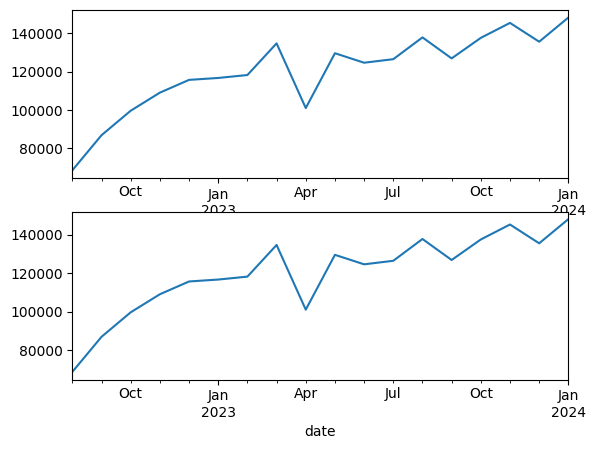

In [16]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo
plt.subplot(2,1,1)
data_set.numTrx.plot(style='-')
plt.subplot(2,1,2)
data_set['2022-08-01':'2024-01-01'].numTrx.plot(style='-')

In [ ]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo
data_set = data_set.drop(['idCompany'], axis=1)


In [43]:
data_set.head()

,numTrx
date,
2022-08-01,68599
2022-09-01,86862
2022-10-01,99611
2022-11-01,109018
2022-12-01,115665


In [20]:
# Escalar entre -1 y 1 los datos de la variable a predecir
scalar = MinMaxScaler(feature_range=(-1,1))
dataset_arr = scalar.fit_transform(data_set)

In [33]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento
steps  = 2
xtrain = []
ytrain = []

for i in range(len(dataset_arr)-steps):
  xtrain.append(dataset_arr[i:i+steps])
  ytrain.append(dataset_arr[i+steps])




In [34]:
# Convertir las listas en arrays de numpy

xtrain = np.asanyarray(xtrain)
ytrain = np.asanyarray(ytrain)

print(xtrain.shape , ytrain.shape)

(16, 2, 1) (16, 1)


In [ ]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)
print(xtrain.shape , ytrain.shape)

In [35]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura
model = Sequential()
# Una capa LSTM de 256 neuronas con activación relu
model.add(LSTM(units=256, return_sequences = True, activation='relu', input_shape=(2,1)))
model.add(Dropout(0.07))
# Una capa LSTM de 128 neuronas con activación relu
model.add(LSTM(units=128, return_sequences = True, activation='relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 64 neuronas con activación relu
model.add(LSTM(units=64, return_sequences = True, activation='relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 32 neuronas con activación relu
model.add(LSTM(units=32, return_sequences = True, activation='relu'))
model.add(Dropout(0.07))
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
model.add(LSTM(units=16, return_sequences = False, activation='relu'))
model.add(Dropout(0.07))
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
model.add(Dense(64))
model.add(Dense(21))
# Finalmente agregar una capa densa de salida
model.add(Dense(1))
# Imprimir el summary del  modelo
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                       │ (None, 2, 256)              │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 2, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 2, 128)              │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 2, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 2, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 2, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_18 (LSTM)                       │ (None, 2, 32)               │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 2, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 21)                  │           1,365 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 528,747 (2.02 MB)

 Trainable params: 528,747 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
# Compilar el modelo con una funcion de error mse y un optimizador adam
model.compile(loss='mse', optimizer = 'adam')


In [37]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16

history = model.fit(xtrain, ytrain, epochs=100, validation_split=0.1, batch_size=16, verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - loss: 0.2490 - val_loss: 0.7098
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.2386 - val_loss: 0.6853
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 0.2282 - val_loss: 0.6601
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 0.2178 - val_loss: 0.6342
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - loss: 0.2076 - val_loss: 0.6076
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.1971 - val_loss: 0.5803
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 0.1868 - val_loss: 0.5524
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 0.1770 - val_loss: 0.5240
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.1670 - val_loss: 0.4951
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - loss: 0.1583 - val_loss: 0.4659
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.1488 - val_loss: 0.4364
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.1406 - 

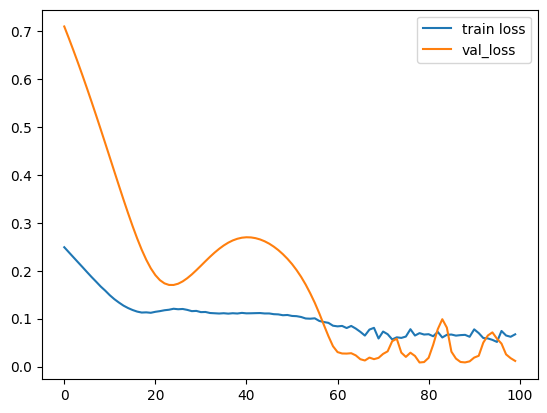

In [39]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val_loss'])
plt.show()

In [40]:
# Guardar el modelo y salvarlo en disco
model.save('mi_forecasting_2jdpc.h5')

In [48]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
my_xtest = np.array([116672, 86862, 135537, 124599, 99611])

my_xtest_reshaped = my_xtest.reshape((1, 5, 1))

ypred = model.predict(my_xtest_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error



In [ ]:
mean_squared_error(my_xtest_reshaped,ypred)

In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción